# This code is taken from Youtube 
Here,we are creating the layers of deeplearning neurons and make through numpy or usking maths equations.
<a href="https://youtu.be/w8yWXqWQYmU?si=t_tjZiVlL3ridudO"> Youtube</a>

In [1]:
#Importing the library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Data is imported

In [2]:
data_train = pd.read_csv(r"D:\Visual Studio Code\ML\DataSet\Digit Recognizer\train.csv")

In [3]:
data_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In this we are dividing the data into 

In [4]:
#Converting the data into array
data = np.array(data_train)

#Taking value of rows and columns
m,n = data.shape

#Suffling the data 
np.random.shuffle(data)

#Trasposing the data
data_dev = data[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:n]
x_dev = x_dev/255


#Now creating the training data
train_data = data[1000:m].T

y_train =train_data[0]
x_train = train_data[1:n]
x_train = x_train/255

In [5]:
y_train 

array([3, 3, 6, ..., 2, 8, 7], dtype=int64)

In [6]:
#Make layers of neuron 

def init_params():
    w1 = np.random.rand(10,784) -0.5
    b1 = np.random.rand(10,1) -0.5
    w2 = np.random.rand(10,10) -0.5
    b2 = np.random.rand(10,1) -0.5
    return w1 ,b1, w2, b2


def ReLU (Z):
    return np.maximum(Z,0)

def softmax(Z):
    A =np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(w1,b1,w2,b2,x):
    z1 = w1.dot(x) +b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) +b2
    a2 =softmax(z2)
    
    return z1,a1,z2,a2

def one_hot(Y):
    one_hot_y = np.zeros((Y.size,Y.max() +1 ))
    one_hot_y[np.arange(Y.size),Y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

def deriv_ReLU (Z):
    return Z >0
    
    
def back_prop(z1,a1,z2,a2,w2,X,Y):
    one_hot_y = one_hot(Y)
    dZ2 = a2 - one_hot_y
    dW2 = 1/m * dZ2.dot(a1.T)
    dB2 =1/m * np.sum(dZ2)
    dZ1 = w2.T.dot(dZ2) * deriv_ReLU(z1)
    
    dW1 = 1/m * dZ1.dot(X.T)
    dB1 =1/m * np.sum(dZ1)
    
    return dW1,dB1,dW2,dB2


def update_params(w1,b1,w2,b2,dW1,dB1,dW2,dB2,alpha):
    
    w1 = w1 - alpha*dW1
    b1 = b1 - alpha*dB1
    w2 = w2 - alpha*dW2
    b2 = b2 - alpha*dB2
    return w1,b1,w2,b2
    

In [7]:
#Here is fucntion that will run the neuron 

def get_predictions(a2):
    return np.argmax(a2,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions==Y) / Y.size

def gradient_descent(X,Y,iterations , alpha):
    
    w1,b1,w2,b2 =init_params()
    for i in range(iterations):
        z1,a1,z2,a2 = forward_prop(w1,b1,w2,b2,X)
        dW1,dB1,dW2,dB2 = back_prop(z1,a1,z2,a2,w2,X,Y)
        w1,b1,w2,b2 = update_params(w1,b1,w2,b2,dW1,dB1,dW2,dB2,alpha)
        
        if i %10  ==0:
            print("Iteration: ",i)
            A= get_predictions(a2)
            print("Accuracy: " ,get_accuracy(A,Y))
    return w1,b1,w2,b2

In [8]:
#Training the data
w1,b1,w2,b2 = gradient_descent(x_train,y_train,1000,0.1)

Iteration:  0
[9 7 7 ... 7 7 1] [3 3 6 ... 2 8 7]
Accuracy:  0.0665609756097561
Iteration:  10
[9 7 2 ... 9 1 7] [3 3 6 ... 2 8 7]
Accuracy:  0.2203170731707317
Iteration:  20
[9 7 6 ... 6 7 7] [3 3 6 ... 2 8 7]
Accuracy:  0.29848780487804877
Iteration:  30
[9 7 6 ... 6 6 7] [3 3 6 ... 2 8 7]
Accuracy:  0.33265853658536587
Iteration:  40
[5 0 2 ... 6 6 7] [3 3 6 ... 2 8 7]
Accuracy:  0.3578048780487805
Iteration:  50
[3 7 2 ... 6 6 7] [3 3 6 ... 2 8 7]
Accuracy:  0.3926829268292683
Iteration:  60
[3 5 2 ... 3 6 7] [3 3 6 ... 2 8 7]
Accuracy:  0.4361951219512195
Iteration:  70
[3 5 2 ... 3 8 7] [3 3 6 ... 2 8 7]
Accuracy:  0.4615365853658537
Iteration:  80
[3 3 2 ... 3 8 7] [3 3 6 ... 2 8 7]
Accuracy:  0.48373170731707316
Iteration:  90
[3 3 2 ... 8 8 7] [3 3 6 ... 2 8 7]
Accuracy:  0.5015609756097561
Iteration:  100
[3 3 2 ... 8 8 7] [3 3 6 ... 2 8 7]
Accuracy:  0.5201707317073171
Iteration:  110
[3 3 2 ... 8 8 7] [3 3 6 ... 2 8 7]
Accuracy:  0.5364390243902439
Iteration:  120
[3 3 2 .

In [9]:
#Make function that make prediction of the data

def make_prediction(X,w1,b1,w2,b2):
    _,_,_,a2 = forward_prop(w1,b1,w2,b2,X)
    predictions = get_predictions(a2)
    return predictions


def test_prediction(index , w1,b1,w2,b2):
    current_image = x_train[:,index,None]
    prediction = make_prediction(x_train[:,index,None],w1,b1,w2,b2)
    label = y_train[index]
    print("Prediction: ",prediction)
    print("Lable: ",label)
    
    current_image = current_image.reshape((28,28))*255
    plt.gray()
    plt.imshow(current_image,interpolation='nearest')
    plt.show()    

Prediction:  [3]
Lable:  3


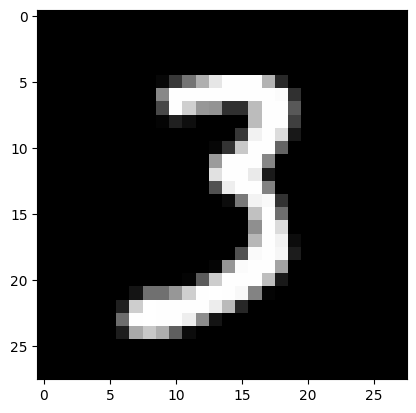

In [10]:
test_prediction(1569,w1,b1,w2,b2)

In [11]:
#Making prediction using testing data

dev_predictions = make_prediction(x_dev,w1,b1,w2,b2)
get_accuracy(dev_predictions,y_dev)

[3 9 0 9 5 8 0 0 7 5 7 8 5 5 1 0 9 6 6 7 4 1 7 6 3 0 7 5 1 8 3 8 2 2 2 3 2
 9 9 4 0 8 5 7 3 6 1 5 2 1 9 0 0 8 3 2 3 2 1 9 9 1 8 5 6 2 0 3 0 0 0 1 6 2
 3 7 0 8 3 8 2 3 1 4 3 5 6 5 1 7 2 4 8 0 9 5 8 2 9 4 8 9 5 8 9 4 1 1 3 5 1
 3 8 2 0 5 0 1 9 0 2 4 4 8 9 3 2 5 1 8 6 1 4 1 4 9 7 9 4 2 7 0 5 3 6 6 9 7
 8 2 8 9 8 7 4 4 7 3 8 4 2 9 2 0 3 1 8 9 7 7 8 6 3 7 0 0 2 6 9 5 1 1 3 5 0
 7 9 4 7 1 4 4 2 1 7 9 9 1 2 0 0 4 7 5 5 2 0 9 2 2 6 0 7 1 2 3 9 5 0 2 3 4
 0 7 4 5 1 4 3 3 2 1 9 1 3 0 3 1 5 6 8 6 9 2 7 2 8 0 3 5 4 4 7 6 3 9 7 2 2
 8 2 3 0 5 7 7 6 6 0 5 7 8 2 7 5 3 2 2 6 6 0 5 6 6 0 8 2 0 0 5 4 1 8 2 9 3
 9 4 1 7 5 1 2 3 0 7 4 2 2 6 3 7 6 2 2 0 7 8 3 3 3 9 0 7 2 2 3 9 1 0 1 3 7
 2 7 4 8 1 9 6 3 3 2 2 7 1 1 0 9 6 8 0 5 2 7 8 7 4 1 4 9 9 3 8 9 7 0 6 9 8
 8 3 7 9 7 1 0 0 0 7 8 9 1 7 7 0 9 5 7 4 2 0 2 3 3 2 2 0 6 2 8 6 9 4 7 6 8
 1 2 7 2 6 2 8 7 3 0 5 3 3 6 3 5 4 8 1 1 0 9 8 3 9 8 3 8 2 5 4 8 5 3 2 0 3
 9 5 6 2 9 7 1 2 2 6 8 4 0 3 2 6 6 4 7 5 9 7 0 2 7 4 2 9 5 9 1 4 9 6 0 0 7
 0 1 9 7 9 6 0 3 4 5 7 3 

0.873